In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train_clean.csv')
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Output
0,February,30,Lawyer,18859.380,1360.615000,6,4,5640,4,14,...,1,330.26,27.911640,159.000000,Yes,40.292010,59.606647,Low_spent_Large_value_payments,306.162843,1
1,July,39,Writer,46477.560,4059.130000,7,10,24,6,46,...,0,1799.87,32.851676,110.000000,NM,212.248190,109.409292,High_spent_Medium_value_payments,334.255517,0
2,July,52,Mechanic,153147.640,12915.303333,5,4,3,1,3,...,0,1222.96,40.264738,308.000000,No,81.918963,152.908747,High_spent_Medium_value_payments,1306.702624,0
3,March,39,Doctor,16833.105,1542.758750,5,5,4,4,7,...,0,35.71,30.634617,232.000000,No,51.702938,160.069253,Low_spent_Small_value_payments,232.503683,2
4,May,31,Media_Manager,131693.370,10696.447500,0,7,10,3,27,...,0,1428.94,29.807968,267.000000,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.081978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,April,32,Lawyer,26265.810,2464.817500,3,3,17,4,13,...,0,1259.60,26.158118,221.138208,Yes,46.662502,222.337193,Low_spent_Small_value_payments,267.482055,1
69996,April,39,Accountant,31407.100,2615.258333,7,7,29,8,27,...,0,2949.79,25.757231,77.000000,Yes,115.206873,177.448358,Low_spent_Medium_value_payments,248.870602,0
69997,June,23,Musician,35880.370,3057.030833,4,1,3116,2,0,...,0,117.91,23.163388,255.000000,No,55.680936,135.525187,Low_spent_Large_value_payments,271.203766,2
69998,August,55,Musician,21700.680,1808.390000,5,7,10,0,25,...,0,427.94,26.094638,321.000000,No,212.314493,128.256220,Low_spent_Large_value_payments,332.182780,2


# Correlation

<Axes: >

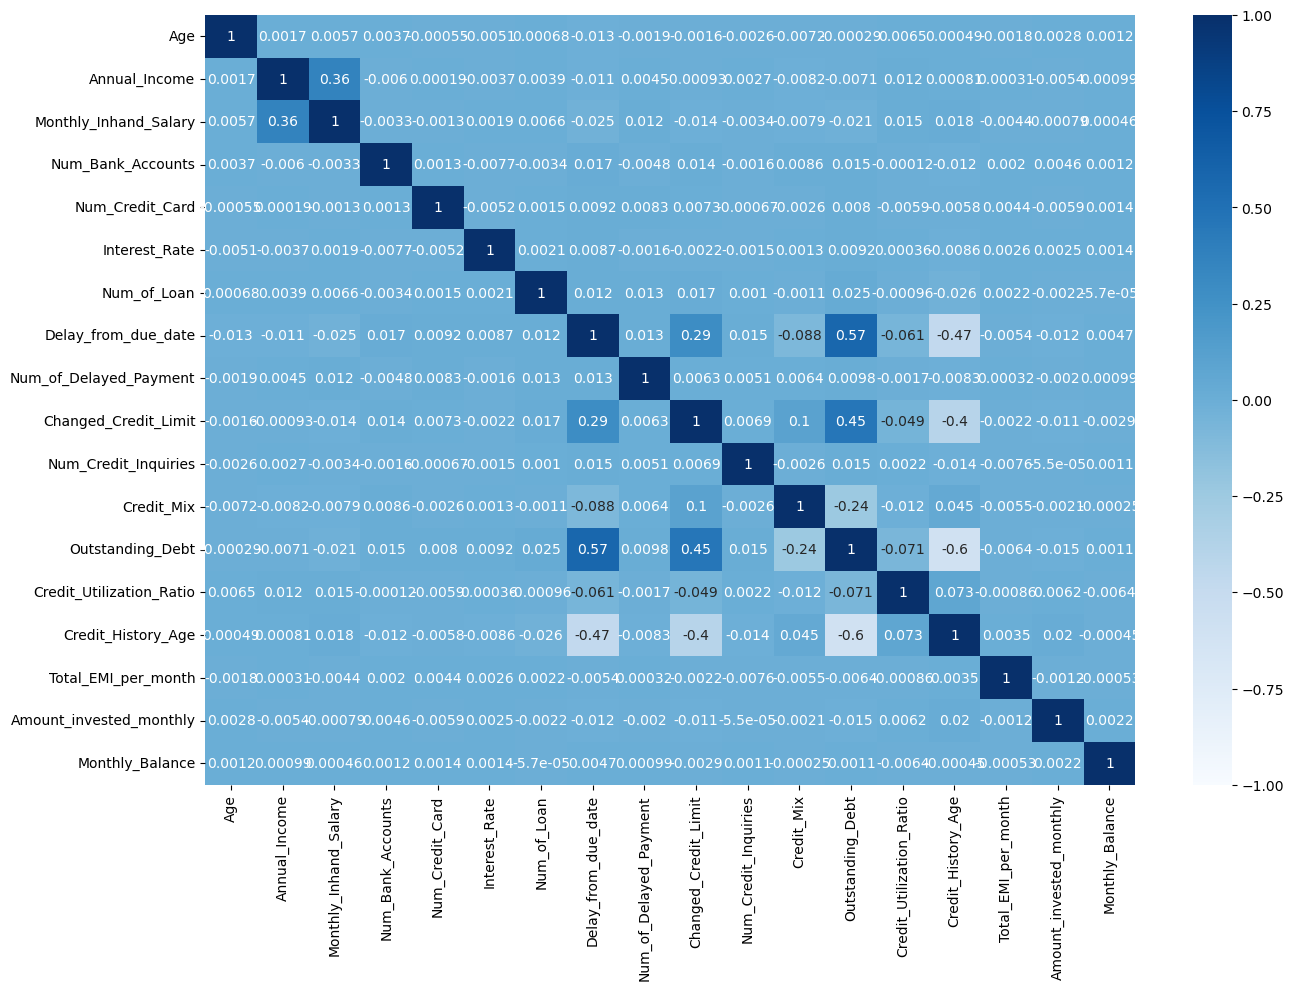

In [3]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.drop('Output',axis=1).corr(numeric_only=True),cmap='Blues',vmin=-1,vmax=1,center=0,annot=True)

### Columns with High Correlation:

<Axes: >

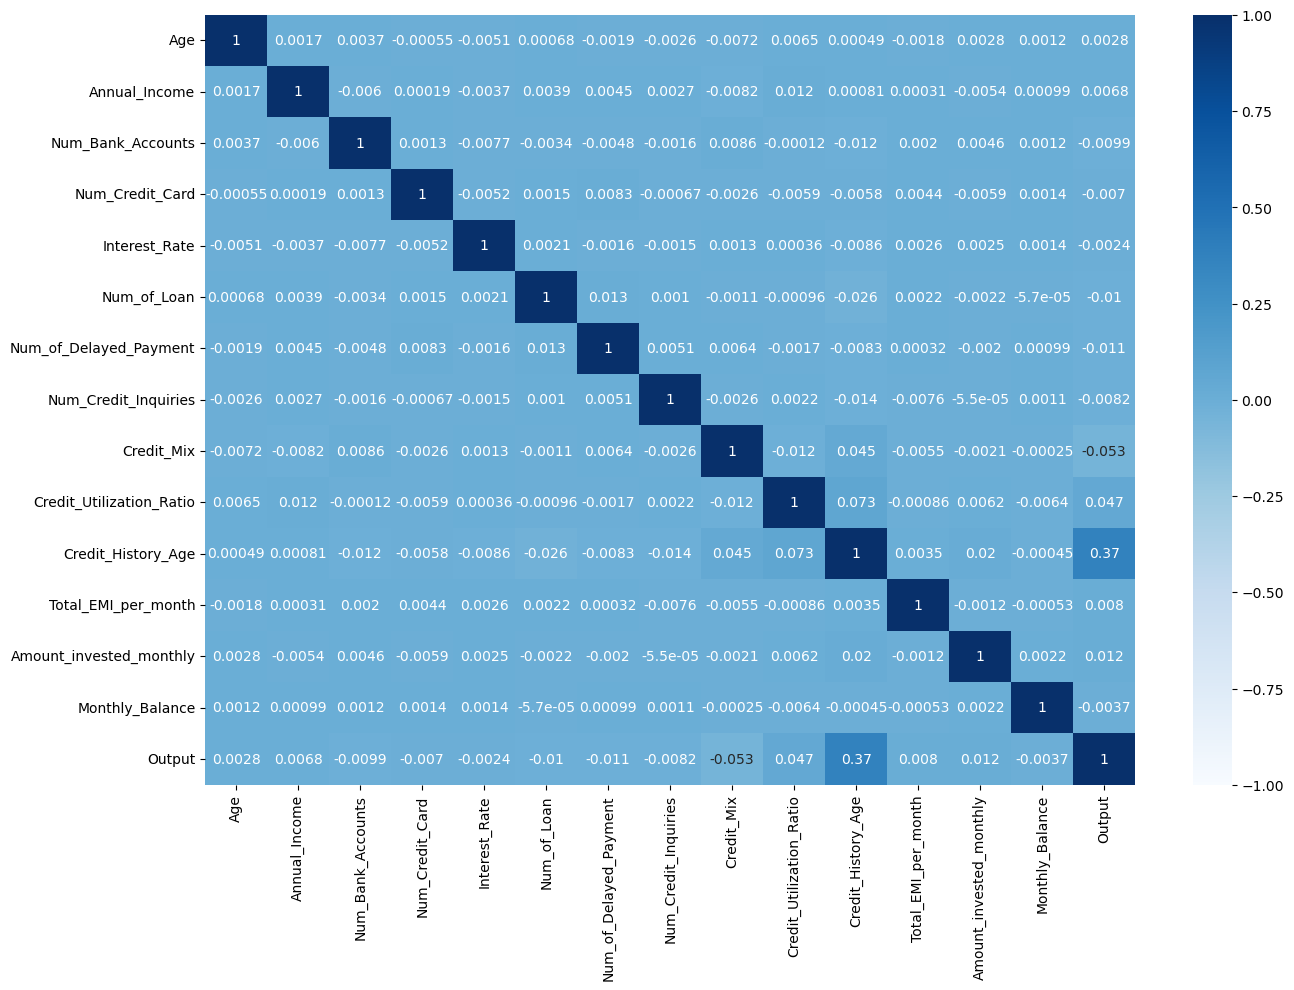

In [4]:
cols = ['Monthly_Inhand_Salary','Outstanding_Debt','Changed_Credit_Limit','Delay_from_due_date']
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.drop(columns=cols,axis=1).corr(numeric_only=True),cmap='Blues',vmin=-1,vmax=1,center=0,annot=True)

## EDA

### Using Violin Plots for both KDE and Boxplots for the Removed Features

<Axes: xlabel='Monthly_Inhand_Salary'>

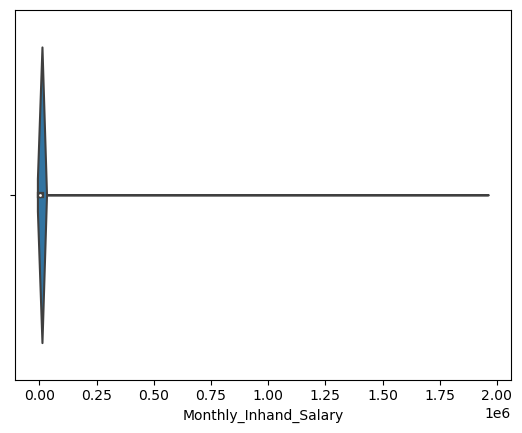

In [5]:
sns.violinplot(x=df['Monthly_Inhand_Salary'])

<Axes: ylabel='Outstanding_Debt'>

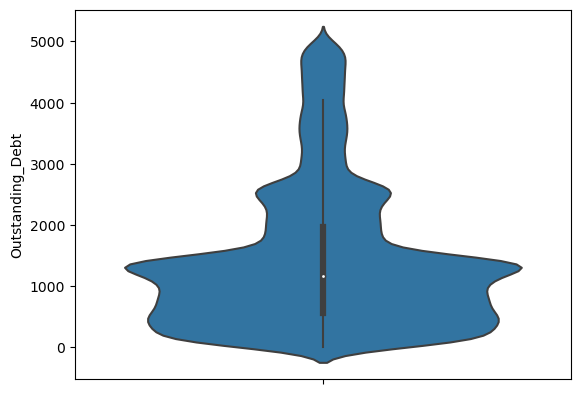

In [6]:
sns.violinplot(y=df['Outstanding_Debt'])

<Axes: xlabel='Changed_Credit_Limit'>

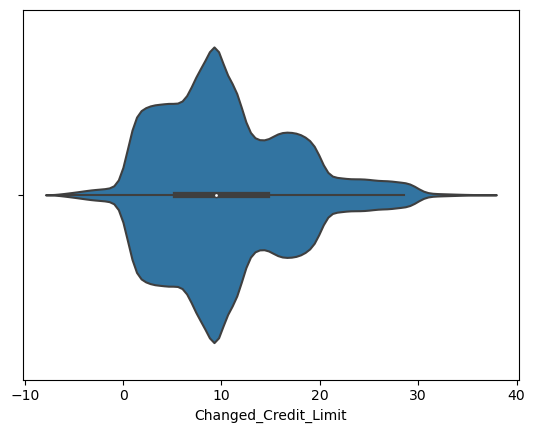

In [7]:
sns.violinplot(x=df['Changed_Credit_Limit'])

<Axes: xlabel='Delay_from_due_date'>

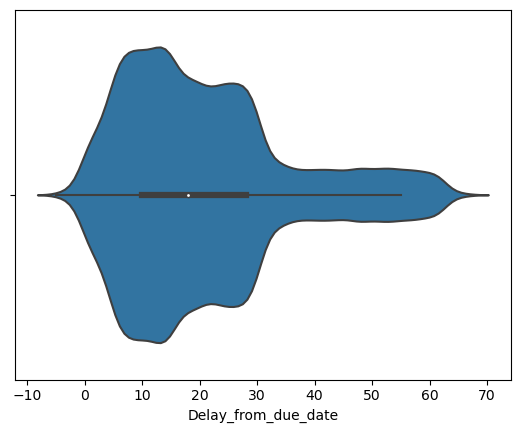

In [8]:
sns.violinplot(x=df['Delay_from_due_date'])

In [9]:
df.drop(columns=cols,axis=1,inplace=True)

In [10]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Output'],
      dtype='object')

## Data Imbalance is Observed

<Axes: xlabel='Output', ylabel='count'>

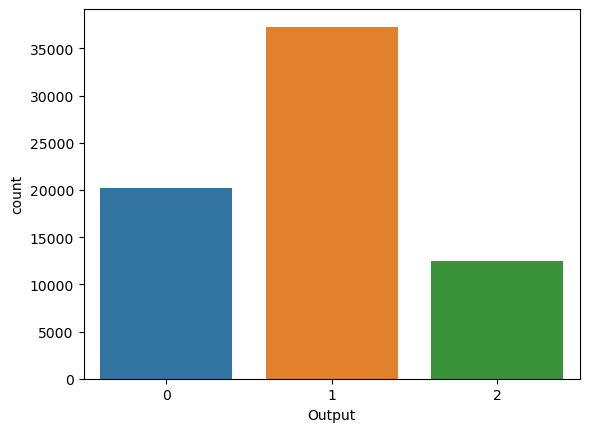

In [11]:
sns.countplot(x=df['Output'])

## Feature selection of Categorical Variable

### Using Mutual Information for Classification

In [12]:
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_cols.append(i)
cat_cols
cat_df=df[cat_cols]

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
cat_df=cat_df.apply(LabelEncoder().fit_transform)

In [14]:
X=cat_df
y=df['Output']
from sklearn.feature_selection import mutual_info_classif
mi1=mutual_info_classif(X,y)

<Axes: >

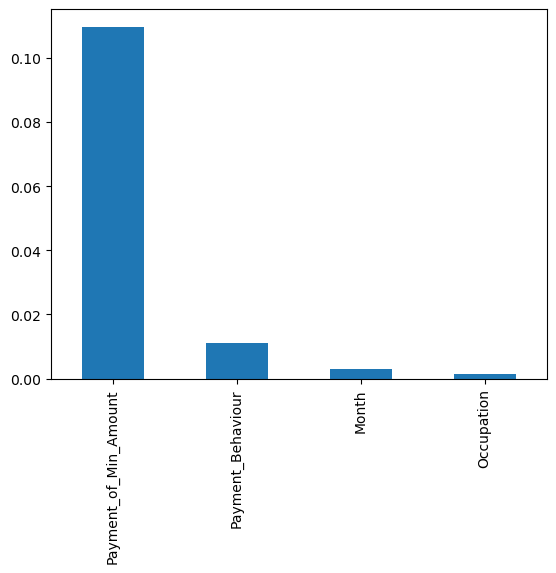

In [15]:
m_score=pd.Series(mi1,index=cat_df.columns)
m_score.sort_values(ascending=False).plot.bar()

### Lets check for other features too

<Axes: >

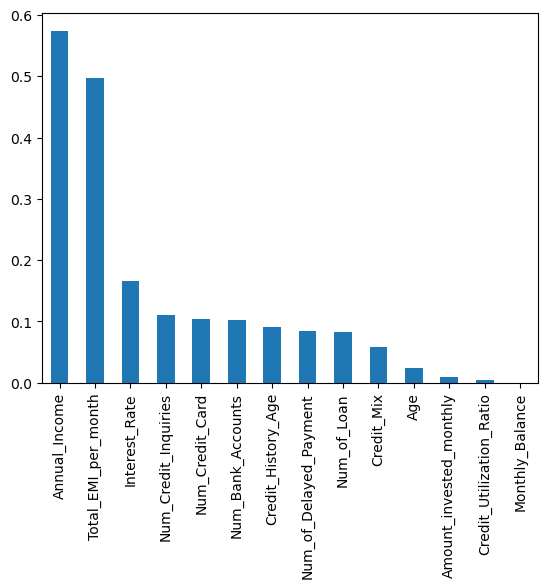

In [16]:
mi2=mutual_info_classif(df.drop(columns=cat_cols+['Output']),df['Output'])
m_score2=pd.Series(mi2,index=df.drop(columns=cat_cols+['Output']).columns)
m_score2.sort_values(ascending=False).plot.bar()

## Overall Comparison

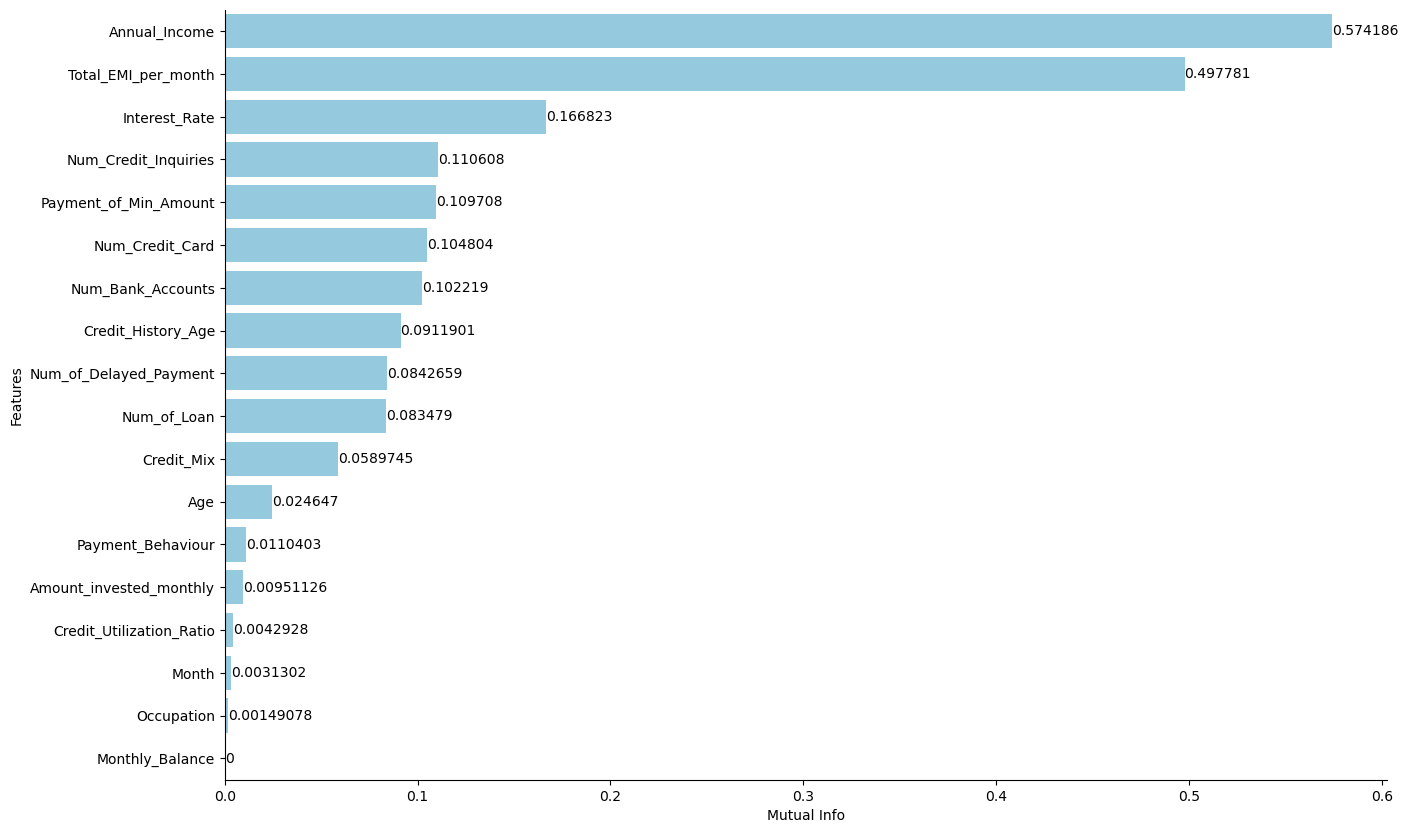

In [17]:
m_final=pd.concat([m_score,m_score2],axis=0)
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.barplot(x=m_final.sort_values(ascending=False),y=m_final.sort_values(ascending=False).index,color='skyblue')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Mutual Info')
plt.ylabel('Features')
sns.despine()

In [18]:
m_final.sort_values(ascending=False).index

Index(['Annual_Income', 'Total_EMI_per_month', 'Interest_Rate',
       'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Num_Credit_Card',
       'Num_Bank_Accounts', 'Credit_History_Age', 'Num_of_Delayed_Payment',
       'Num_of_Loan', 'Credit_Mix', 'Age', 'Payment_Behaviour',
       'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Month',
       'Occupation', 'Monthly_Balance'],
      dtype='object')

## Features to be used for Modelling

In [19]:
fin_col=['Annual_Income', 'Total_EMI_per_month', 'Interest_Rate',
       'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Num_Credit_Card',
       'Num_Bank_Accounts', 'Credit_History_Age', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Credit_Mix', 'Age']

In [20]:
len(fin_col)

12